## train.csv 데이터 불러오기

In [2]:
import pandas as pd

total_df = pd.read_csv("/opt/ml/dataset/train/train.csv")
total_df

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
...,...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '손병희', 'start_idx': 17, 'end_idx': 19...",per:colleagues,wikipedia
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, ...",org:top_members/employees,wikitree
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': ...",no_relation,wikipedia


## Column 전처리하기

In [3]:
subject_entity = []
object_entity = []
for i,j in zip(total_df['subject_entity'], total_df['object_entity']):
    i = eval(i)['word']
    j = eval(j)['word']

    subject_entity.append(i)
    object_entity.append(j)
out_dataset = pd.DataFrame({'id':total_df['id'], 'sentence':total_df['sentence'],'subject_entity':subject_entity,'object_entity':object_entity,'label':total_df['label'],})
out_dataset

,id,sentence,subject_entity,object_entity,label
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,비틀즈,조지 해리슨,no_relation
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,민주평화당,대안신당,no_relation
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,광주FC,한국프로축구연맹,org:member_of
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,아성다이소,박정부,org:top_members/employees
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,요미우리 자이언츠,1967,no_relation
...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,유기준,부산 서구·동구,per:employee_of
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...",최시형,손병희,per:colleagues
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,완도군,신우철,org:top_members/employees
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...",JTBC,중앙홀딩스,no_relation


In [43]:
import numpy as np
out_dataset['sentence'].replace('', np.nan, inplace=True)
out_dataset = out_dataset.dropna(how = 'any')
print('null 제거 후 학습 데이터셋 : {}'.format(len(out_dataset)))

null 제거 후 학습 데이터셋 : 32470


## Mecab 사용 - 예시

In [44]:
from konlpy.tag import Mecab

mecab = Mecab()
morphs = mecab.pos(out_dataset['sentence'][0], join=False)
print(morphs)

[('〈', 'SY'), ('Something', 'SL'), ('〉', 'SY'), ('는', 'JX'), ('조지', 'NNP'), ('해리슨', 'NNP'), ('이', 'JKS'), ('쓰', 'VV'), ('고', 'EC'), ('비틀즈', 'NNP'), ('가', 'JKS'), ('1969', 'SN'), ('년', 'NNBC'), ('앨범', 'NNG'), ('《', 'SY'), ('Abbey', 'SL'), ('Road', 'SL'), ('》', 'SY'), ('에', 'JKB'), ('담', 'VV'), ('은', 'ETM'), ('노래', 'NNG'), ('다', 'VCP+EF'), ('.', 'SF')]


## Mecab 사용 - 문장 판단하기

In [45]:
def morph_filter(texts):
    """
    명사(NN), 동사(V), 형용사(J)의 포함 여부에 따라 문장 필터링
    """
    NN_TAGS = ["NNG", "NNP", "NNB", "NP"]
    V_TAGS = ["VV", "VA", "VX", "VCP", "VCN", "XSN", "XSA", "XSV"]
    J_TAGS = ["JKS", "J", "JO", "JK", "JKC", "JKG", "JKB", "JKV", "JKQ", "JX", "JC", "JKI", "JKO", "JKM", "ETM"]

    preprocessed_text = {}
    not_sentence = {}
    for idx, text in enumerate(texts):
        morphs = mecab.pos(text, join=False)
        
        nn_flag = False
        v_flag = False
        j_flag = False
        for morph in morphs:
            pos_tags = morph[1].split("+")
            for pos_tag in pos_tags:
                if not nn_flag and pos_tag in NN_TAGS:
                    nn_flag = True
                if not v_flag and pos_tag in V_TAGS:
                    v_flag = True
                if not j_flag and pos_tag in J_TAGS:
                    j_flag = True
            if nn_flag and v_flag and j_flag:
                preprocessed_text[idx] = text
                break
        if not(nn_flag and v_flag and j_flag):
            not_sentence[idx] = text
    return preprocessed_text, not_sentence

_, not_sentence = morph_filter(out_dataset['sentence'])

In [46]:
for i, sent in not_sentence.items():
    print(i, sent,"|", out_dataset['subject_entity'][i],"|", out_dataset['object_entity'][i],"|", out_dataset['label'][i])

5 : 유엔, 유럽 의회, 북대서양 조약 기구 (NATO), 국제이주기구, 세계 보건 기구 (WHO), 지중해 연합, 이슬람 협력 기구, 유럽 안보 협력 기구, 국제 통화 기금, 세계무역기구 그리고 프랑코포니. | 북대서양 조약 기구 | NATO | org:alternate_names
354 CJ그룹 이재현 회장이다. | CJ그룹 | 이재현 | org:top_members/employees
1049 시가총액 상위주 역시 삼성전자(1.41%), SK하이닉스(1.24%), 현대차(0.38%), NAVER(1.07%), 현대모비스(0.85%), LG화학(0.79%), 셀트리온(0.97%), 신한지주(0.49%), SK텔레콤(0.62%) 모두 올랐다. | SK하이닉스 | SK텔레콤 | no_relation
1130 박주호 선수 소속팀 울산 현대 유니폼이다. | 박주호 | 울산 현대 | per:employee_of
1260 1979년 10월 26일 박정희 사후 야당화되었으며 1980년 10월 27일 해산되었다. | 박정희 | 1979년 10월 26일 | per:date_of_death
2654 1986년 김건우 선수, 1988년 이용철 선수, 1990년 김동수 선수, 1994년 유지현 선수, 1997년 이병규 선수, 2019년 정우영 선수다. | 김건우 | 1986년 | no_relation
4458 뿌요뿌요의 제작자는 컴파일 대표 니이타니 마사미츠(仁井谷正充). | 컴파일 | 뿌요뿌요 | org:product
4657 후쿠오카 소프트뱅크 호크스 주식회사 대표이사 회장 겸 단장, 일본 프로 야구 명구회 고문이다. | 소프트뱅크 | 주식회사 | no_relation
5069 콜롬비아 축구선수 안드레스 에스코바르(Andrés Escobar) 이야기다. | 안드레스 에스코바르 | 콜롬비아 | per:origin
5263 전 퍼시픽 리그 후쿠오카 소프트뱅크 호크스 2군 타격 코치였다. | 후쿠오카 소프트뱅크 호크스 | 퍼시픽 리그 | org:member_of
5818 서울대학

## WordPiece tokenizing 학습 전과 학습 후 비교

In [47]:
!mkdir wordPieceTokenizer

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
mkdir: cannot create directory 'wordPieceTokenizer': File exists


### 학습 전

In [48]:
from tokenizers import BertWordPieceTokenizer

# Initialize an empty tokenizer
wp_tokenizer = BertWordPieceTokenizer(
    clean_text=True,    # [이순신, ##은, ' ', 조선]
    handle_chinese_chars=True,
    strip_accents=False,    # True: [YepHamza] -> [Yep, Hamza]
    lowercase=False,
)

print(wp_tokenizer.get_vocab_size())

0


In [49]:
type(wp_tokenizer)

tokenizers.implementations.bert_wordpiece.BertWordPieceTokenizer

### 학습 후

In [51]:
# And then train
wp_tokenizer.train(
    files="/opt/ml/klue-level2-nlp-19/resources/wiki_20190620_small.txt",
    vocab_size=100000,  #? limit vocab_size
    min_frequency=2,
    show_progress=True,
    special_tokens=["[PAD]", "[UNK]", "[CLS]", "[SEP]", "[MASK]"],
    limit_alphabet=1000,
    wordpieces_prefix="##"  #? 단어조각으로 판단할 경우 앞에 ##를 붙인다.
)

# Save the files
wp_tokenizer.save_model("wordPieceTokenizer", "my_tokenizer_1sen")

['wordPieceTokenizer/my_tokenizer_1sen-vocab.txt']

In [52]:
print(wp_tokenizer.get_vocab_size())
text = "이순신은 조선 중기의 무신이다."
tokenized_text = wp_tokenizer.encode(text)
print(tokenized_text)
print(tokenized_text.tokens)
print(tokenized_text.ids)

25717
Encoding(num_tokens=9, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
['이', '##순', '##신은', '조선', '중', '##기의', '무신', '##이다', '.']
[706, 1319, 7606, 2001, 754, 2605, 13161, 1896, 16]


### 학습 결과 불러오기

In [113]:
tokenizer = BertWordPieceTokenizer("./wordPieceTokenizer/my_tokenizer_1sen-vocab.txt", lowercase=True)

In [114]:
text = "이순신은 조선 중기의 무신이다."
tokenized_text = wp_tokenizer.encode(text)
print(tokenized_text)
print(tokenized_text.tokens)
print(tokenized_text.ids)

Encoding(num_tokens=9, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
['이', '##순', '##신은', '조선', '중', '##기의', '무신', '##이다', '.']
[706, 1319, 7606, 2001, 754, 2605, 13161, 1896, 16]


In [133]:
from transformers import AutoTokenizer

MODEL_NAME = "klue/bert-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [134]:
tokenized_train_sentences = tokenizer(
    text,
    padding=True,
    truncation=True,
    add_special_tokens=True,
    )

In [135]:
tokenized_sentences

{'input_ids': tensor([[    2, 10661,  2073,  3957,  9652,  2079, 15749, 28674,    18,     3]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

### tokenizer 함수 살펴보기

In [136]:
tokenized_text = tokenizer.tokenize(text)
tokenized_text

['이순신', '##은', '조선', '중기', '##의', '무신', '##이다', '.']

In [137]:
tokenizer.encode(text)

[2, 10661, 2073, 3957, 9652, 2079, 15749, 28674, 18, 3]

In [140]:
tokenizer.encode(
    text,
    add_special_tokens=False,
    max_length=5,
    truncation=True
    )

[10661, 2073, 3957, 9652, 2079]

In [120]:
print(tokenizer.vocab_size)
print(type(tokenizer))

32000
<class 'transformers.models.bert.tokenization_bert_fast.BertTokenizerFast'>


In [121]:
tokenizer.get_vocab()

{'that': 16845,
 '고즈': 30514,
 '사진': 4035,
 '현대건설': 15691,
 '=': 33,
 '안산시': 17233,
 '이조': 25227,
 '레이': 5395,
 '경정': 16367,
 '모터': 8247,
 '빠': 1196,
 '고의': 11242,
 '##89': 22934,
 '그것': 3724,
 '나선': 5120,
 '직능': 29313,
 '증빙': 21875,
 '한단': 13855,
 '형주': 29443,
 '[unused318]': 31818,
 '1909': 25816,
 '입대': 12119,
 '##시네마': 27717,
 '회계사': 24670,
 '보안': 6041,
 '뿌렸': 22637,
 '한창': 7880,
 '원주': 7216,
 '마모': 25723,
 '개막식': 13936,
 '맞은편': 14458,
 '담요': 20931,
 '장량': 26886,
 '값싼': 19793,
 '南': 270,
 '차감': 24647,
 '혈전': 24591,
 '서슴없이': 30215,
 '부단': 19202,
 '덤핑': 29171,
 '강석': 22982,
 '##얌': 2670,
 '다치': 12975,
 '산자': 29430,
 '##□': 3155,
 '대법관': 10535,
 '구요': 5163,
 '>': 34,
 '##유산': 9525,
 '신장': 7827,
 '관절염': 14202,
 '영도': 15159,
 '그쪽': 10576,
 '포상금': 20648,
 '강성': 13272,
 '누굴': 19735,
 '동메달': 14498,
 '##찹': 3024,
 '주저': 8065,
 '도망쳤': 25157,
 '수준급': 30378,
 '엄선': 22497,
 '##저트': 10008,
 '곰곰이': 20230,
 '영유': 18209,
 '하비': 24380,
 '빠지': 5893,
 '에밀': 27369,
 '##99': 19748,
 '가져가': 10068,
 '커다랗'

#### (Special) Token 추가

In [144]:
added_token_num = tokenizer.add_tokens(["깟뻬뜨랑", "케쇽", "우뤼갸", "쳥쇼", "섀료"])
#print(added_token_num)
tokenizer.get_vocab()["케쇽"]
added_token_num += tokenizer.add_special_tokens({"additional_special_tokens":["[SHKIM]", "[/SHKIM]"]})

32001

만약에 vocab을 새롭게 추가했다면, 반드시 model의 embedding layer 사이즈를 늘려주세요!
print(model.get_input_embeddings())
model.resize_token_embeddings(tokenizer.vocab_size + added_token_num)
print(model.get_input_embeddings())

#### 여러 문장 입력

In [148]:
# Single segment input
single_seg_input = tokenizer("이순신은 조선 중기의 무신이다.")

# Multiple segment input
multi_seg_input = tokenizer("이순신은 조선 중기의 무신이다.", "그는 임진왜란을 승리로 이끌었다.")

print(multi_seg_input)

# 배열로 입력하면 출력 결과도 배열로 저장
tokens = tokenizer(
    ["이순신은 조선 중기의 무신이다.", "그는 임진왜란을 승리로 이끌었다."], 
    padding=True  # First sentence will have some PADDED tokens to match second sequence length
)
for i in range(2):
    print("Tokens (int)      : {}".format(tokens['input_ids'][i]))
    print("Tokens (str)      : {}".format([tokenizer.convert_ids_to_tokens(s) for s in tokens['input_ids'][i]]))
    print("Tokens (attn_mask): {}".format(tokens['attention_mask'][i]))
    print()

{'input_ids': [2, 10661, 2073, 3957, 9652, 2079, 15749, 28674, 18, 3, 636, 2259, 15294, 2069, 4644, 2200, 4597, 2359, 2062, 18, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
Tokens (int)      : [2, 10661, 2073, 3957, 9652, 2079, 15749, 28674, 18, 3, 0, 0]
Tokens (str)      : ['[CLS]', '이순신', '##은', '조선', '중기', '##의', '무신', '##이다', '.', '[SEP]', '[PAD]', '[PAD]']
Tokens (attn_mask): [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]

Tokens (int)      : [2, 636, 2259, 15294, 2069, 4644, 2200, 4597, 2359, 2062, 18, 3]
Tokens (str)      : ['[CLS]', '그', '##는', '임진왜란', '##을', '승리', '##로', '이끌', '##었', '##다', '.', '[SEP]']
Tokens (attn_mask): [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]



## 데이터 EDA

### bert tokenizer 사용

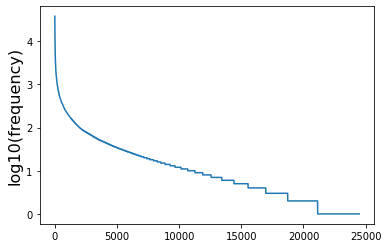

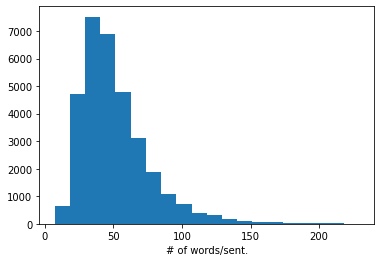

In [99]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoTokenizer


MODEL_NAME = "klue/bert-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

def myFunction(texts) : 
    texts_lens = []
    word_list = []
    word_lens_per_sent = []
    
    # 문장의 길이를 저장 및 띄어쓰기 단위로 토큰화
    for text in texts : 
        texts_lens.append(len(text))
      
        # 띄어쓰기 토큰
        words = tokenizer.tokenize(text)
        word_list.extend(words)
        word_lens_per_sent.append(len(words))
    
    # 문장에 포함된 단어들 카운트
    counter = Counter(word_list)
    
    # 가장 많이 나온 단어 10개
    word_list = counter.most_common(n=300)
    
    # 빈도는 지우고 단어만, 순서대로 저장
    word_list = [word[0] for word in word_list]

    #TODO. 아래와 같은 두 개의 그래프를 그려 출력해봅시다.
    """
    1. X축에는 코퍼스 내 단어들을 출현 빈도 순으로 정렬하고, Y축은 각 단어들의 출현 빈도를 log-scale로 나타내는 그래프
    2. 코퍼스 내의 각 문장들의 단어 개수에 대한 히스토그램
    """
    # 등장 빈도순으로 단어를 정렬하여 시각화
    sorted_words = sorted(counter.items(), key=lambda item: (-item[1], item[0]))
    sorted_frequency_logscale = [np.log10(el[1]) for el in sorted_words]
    indices = np.arange(len(sorted_frequency_logscale))
    plt.plot(indices, sorted_frequency_logscale)
    plt.ylabel('log10(frequency)', fontsize=16)
    plt.show()
    plt.cla()

    # 문장 단어 개수에 대한 히스토그램 시각화
    plt.hist(word_lens_per_sent, bins=20)
    plt.xlabel("# of words/sent.")
    
     
    return {"texts" : len(texts),
            "num_unique_words":len(counter),
            "maximum" : np.max(texts_lens), "minumum" : np.min(texts_lens),
            "mean" : np.mean(texts_lens), "median" : np.median(texts_lens),
            "word_maximum" : np.max(word_lens_per_sent), "word_minumum" : np.min(word_lens_per_sent),
            "word_mean" : np.mean(word_lens_per_sent), "word_median" : np.median(word_lens_per_sent),
            "TOP10_word":word_list}

EDA_bert_result = myFunction(out_dataset['sentence'])

(,)제거 필요 : remove_useless_breacket (2-1실습파일)
[UNK] 처리 필요 : 토큰 / 스페셜 토큰 추가하기 (3강)
",',‘,“ 처리 : clean_punc : puctuation 정규화 작업
1~15... 처리

In [100]:
EDA_bert_result

{'texts': 32470,
 'num_unique_words': 24478,
 'maximum': 455,
 'minumum': 14,
 'mean': 97.08395441946412,
 'median': 87.0,
 'word_maximum': 229,
 'word_minumum': 7,
 'word_mean': 50.95860794579612,
 'word_median': 46.0,
 'TOP10_word': [',',
  '.',
  '##의',
  '##다',
  '##을',
  '##에',
  '##는',
  '##년',
  '(',
  ')',
  '##이',
  '##를',
  '##은',
  '##일',
  '##하',
  '##로',
  '##에서',
  '##가',
  '##월',
  '##고',
  '##으로',
  '##했',
  '##한',
  '##과',
  '##었',
  '##인',
  '##와',
  '##였',
  '있',
  '[UNK]',
  "'",
  '"',
  '##대',
  '1',
  '##게',
  '##지',
  '##되',
  '등',
  '##도',
  '##당',
  '2',
  '##이다',
  '##자',
  '##기',
  '이',
  '##들',
  '##하고',
  '3',
  '##스',
  '##시',
  '##장',
  '##어',
  '그',
  '##해',
  '##세',
  '##며',
  '는',
  '##던',
  '~',
  '4',
  '-',
  '##원',
  '##서',
  '##군',
  '·',
  '##으며',
  '##부',
  '##사',
  '은',
  '것',
  '5',
  '##하여',
  '##부터',
  '##된',
  '제',
  '되',
  '하',
  '‘',
  '’',
  '##회',
  '##주',
  '##수',
  '10',
  '##명',
  '##국',
  '한국',
  '##만',
  '##학교',
  '“',
  '6',
  '#

### bert tokenizer 사용

100%|████████████████████████████████████████████████████████████████████████████████████████████| 32470/32470 [00:07<00:00, 4498.06it/s]


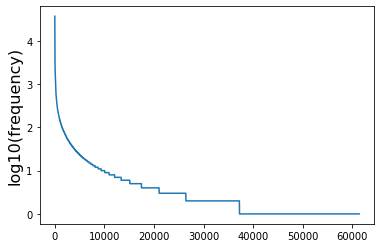

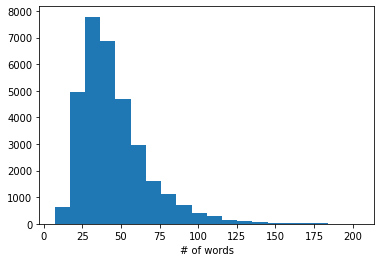

In [97]:
#from konlpy.tag import Kkma
from konlpy.tag import Mecab
from tqdm import tqdm

tokenizer=Mecab()  
#text = "싸피에서 열공한 우린, 대한민국을 이끌 SW인재"
#print(tokenizer.morphs(text))
#['싸', '아', '피', '에서', '열', '공한', '우리', 'ㄴ', ',', '대한민국', '을', '이끌', 'ㄹ', 'SW', '인재']

def myFunction(texts) : 
    texts_lens = []
    word_list = []
    word_lens_per_sent = []
    
    # 문장의 길이를 저장 및 형태소 단위로 토큰화
    for text in tqdm(texts) : 
        texts_lens.append(len(text))
      
        words = tokenizer.morphs(text)
        word_list.extend(words)
        word_lens_per_sent.append(len(words))
    
    # 문장에 포함된 단어들 카운트
    counter = Counter(word_list)
    
    # 가장 많이 나온 단어 10개
    word_list = counter.most_common(n=300)

    # 빈도는 지우고 단어만, 순서대로 저장
    word_list = [word[0] for word in word_list]

    #TODO. 아래와 같은 두 개의 그래프를 그려 출력해봅시다.
    """
    1. X축에는 코퍼스 내 단어들을 출현 빈도 순으로 정렬하고, Y축은 각 단어들의 출현 빈도를 log-scale로 나타내는 그래프
    2. 코퍼스 내의 각 문장들의 단어 개수에 대한 히스토그램
    """

    # 등장 빈도순으로 단어를 정렬하여 시각화
    sorted_words = sorted(counter.items(), key=lambda item: (-item[1], item[0]))
    sorted_frequency_logscale = [np.log10(el[1]) for el in sorted_words]
    indices = np.arange(len(sorted_frequency_logscale))
    plt.plot(indices, sorted_frequency_logscale)
    plt.ylabel('log10(frequency)', fontsize=16)
    plt.show()

    # 문장 단어 개수에 대한 히스토그램 시각화
    plt.hist(word_lens_per_sent, bins=20)
    plt.xlabel("# of words")
     
    return {"texts" : len(texts),
            "num_unique_words":len(counter),
            "maximum" : np.max(texts_lens), "minumum" : np.min(texts_lens),
            "mean" : np.mean(texts_lens), "median" : np.median(texts_lens),
            "word_maximum" : np.max(word_lens_per_sent), "word_minumum" : np.min(word_lens_per_sent),
            "word_mean" : np.mean(word_lens_per_sent), "word_median" : np.median(word_lens_per_sent),
            "TOP10_word":word_list[:300]}

EDA_Mecab_result = myFunction(out_dataset['sentence'])

In [98]:
EDA_Mecab_result

{'texts': 32470,
 'num_unique_words': 61365,
 'maximum': 455,
 'minumum': 14,
 'mean': 97.08395441946412,
 'median': 87.0,
 'word_maximum': 204,
 'word_minumum': 7,
 'word_mean': 45.28376963350785,
 'word_median': 40.0,
 'TOP10_word': [',',
  '의',
  '.',
  '다',
  '을',
  '이',
  '는',
  '에',
  '하',
  '년',
  '(',
  '를',
  ')',
  '은',
  '고',
  '일',
  '에서',
  '가',
  '로',
  '으로',
  '월',
  '한',
  '했',
  '과',
  '와',
  '었',
  '인',
  '되',
  '있',
  '였',
  "'",
  '1',
  '들',
  '2',
  '"',
  '등',
  '도',
  '3',
  '어',
  '여',
  '며',
  '그',
  '적',
  '해',
  '기',
  '던',
  '4',
  '세',
  '-',
  '·',
  '자',
  '게',
  '당',
  '대표',
  '것',
  '5',
  '리그',
  '전',
  '제',
  '된',
  '대',
  '에게',
  '‘',
  '씨',
  '10',
  '6',
  '지',
  '선수',
  '명',
  '까지',
  '받',
  '7',
  '8',
  '“',
  '부터',
  '”',
  '’',
  '팀',
  '대한민국',
  '한국',
  '만',
  '경기',
  '면서',
  '았',
  '함께',
  '9',
  '11',
  '중',
  '밝혔',
  '할',
  '~',
  '대통령',
  '12',
  '한다',
  '이후',
  '수',
  '및',
  '의원',
  '후',
  '다고',
  '지역',
  '후보',
  '대학교',
  '지난',
  '아',
 

In [101]:
EDA_bert_result

{'texts': 32470,
 'num_unique_words': 24478,
 'maximum': 455,
 'minumum': 14,
 'mean': 97.08395441946412,
 'median': 87.0,
 'word_maximum': 229,
 'word_minumum': 7,
 'word_mean': 50.95860794579612,
 'word_median': 46.0,
 'TOP10_word': [',',
  '.',
  '##의',
  '##다',
  '##을',
  '##에',
  '##는',
  '##년',
  '(',
  ')',
  '##이',
  '##를',
  '##은',
  '##일',
  '##하',
  '##로',
  '##에서',
  '##가',
  '##월',
  '##고',
  '##으로',
  '##했',
  '##한',
  '##과',
  '##었',
  '##인',
  '##와',
  '##였',
  '있',
  '[UNK]',
  "'",
  '"',
  '##대',
  '1',
  '##게',
  '##지',
  '##되',
  '등',
  '##도',
  '##당',
  '2',
  '##이다',
  '##자',
  '##기',
  '이',
  '##들',
  '##하고',
  '3',
  '##스',
  '##시',
  '##장',
  '##어',
  '그',
  '##해',
  '##세',
  '##며',
  '는',
  '##던',
  '~',
  '4',
  '-',
  '##원',
  '##서',
  '##군',
  '·',
  '##으며',
  '##부',
  '##사',
  '은',
  '것',
  '5',
  '##하여',
  '##부터',
  '##된',
  '제',
  '되',
  '하',
  '‘',
  '’',
  '##회',
  '##주',
  '##수',
  '10',
  '##명',
  '##국',
  '한국',
  '##만',
  '##학교',
  '“',
  '6',
  '#

In [132]:
from konlpy.tag import Kkma
from tqdm import tqdm

tokenizer=Kkma()  
#text = "싸피에서 열공한 우린, 대한민국을 이끌 SW인재"
#print(tokenizer.morphs(text))
#['싸', '아', '피', '에서', '열', '공한', '우리', 'ㄴ', ',', '대한민국', '을', '이끌', 'ㄹ', 'SW', '인재']

tokenizer.morphs('惠寧君 李𥘺'.encode("utf-16").decode("utf-16"))
# out_dataset['sentence'][3926] # 여기서 오류남 한자때문으로 추정
#혜령군 이정 또는 이지(惠寧君 李𥘺 또는 李祉, 1407년 ~ 1440년)은 조선의 왕족으로 태종의 넷째 서자이다.

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 0: invalid continuation byte

In [124]:
from konlpy.tag import Kkma
from tqdm import tqdm

tokenizer=Kkma()  
#text = "싸피에서 열공한 우린, 대한민국을 이끌 SW인재"
#print(tokenizer.morphs(text))
#['싸', '아', '피', '에서', '열', '공한', '우리', 'ㄴ', ',', '대한민국', '을', '이끌', 'ㄹ', 'SW', '인재']

def myFunction(texts) : 
    texts_lens = []
    word_list = []
    word_lens_per_sent = []
    
    # 문장의 길이를 저장 및 형태소 단위로 토큰화
    for text in tqdm(texts) : 
        texts_lens.append(len(text))
      
        words = tokenizer.morphs(text)
        word_list.extend(words)
        word_lens_per_sent.append(len(words))
    
    # 문장에 포함된 단어들 카운트
    counter = Counter(word_list)
    
    # 가장 많이 나온 단어 10개
    word_list = counter.most_common(n=300)

    # 빈도는 지우고 단어만, 순서대로 저장
    word_list = [word[0] for word in word_list]

    #TODO. 아래와 같은 두 개의 그래프를 그려 출력해봅시다.
    """
    1. X축에는 코퍼스 내 단어들을 출현 빈도 순으로 정렬하고, Y축은 각 단어들의 출현 빈도를 log-scale로 나타내는 그래프
    2. 코퍼스 내의 각 문장들의 단어 개수에 대한 히스토그램
    """

    # 등장 빈도순으로 단어를 정렬하여 시각화
    sorted_words = sorted(counter.items(), key=lambda item: (-item[1], item[0]))
    sorted_frequency_logscale = [np.log10(el[1]) for el in sorted_words]
    indices = np.arange(len(sorted_frequency_logscale))
    plt.plot(indices, sorted_frequency_logscale)
    plt.ylabel('log10(frequency)', fontsize=16)
    plt.show()

    # 문장 단어 개수에 대한 히스토그램 시각화
    plt.hist(word_lens_per_sent, bins=20)
    plt.xlabel("# of words")
     
    return {"texts" : len(texts),
            "num_unique_words":len(counter),
            "maximum" : np.max(texts_lens), "minumum" : np.min(texts_lens),
            "mean" : np.mean(texts_lens), "median" : np.median(texts_lens),
            "word_maximum" : np.max(word_lens_per_sent), "word_minumum" : np.min(word_lens_per_sent),
            "word_mean" : np.mean(word_lens_per_sent), "word_median" : np.median(word_lens_per_sent),
            "TOP10_word":word_list[:300]}

EDA_Kkma_result = myFunction(out_dataset['sentence'])

 12%|███████████▍                                                                                   | 3926/32470 [02:49<20:31, 23.18it/s]


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 0: invalid continuation byte

## 모델 출력 결과확인하기

In [ ]:


tokens_pt = tokenizer("이순신은 조선 중기의 무신이다.", return_tensors="pt")
for key, value in tokens_pt.items():
    print("{}:\n\t{}".format(key, value))

outputs = model(**tokens_pt)
last_hidden_state = outputs.last_hidden_state
pooler_output = outputs.pooler_output

print("\nToken wise output: {}, Pooled output: {}".format(last_hidden_state.shape, pooler_output.shape))

### 모델 출력 결과확인하기 - datacollator

In [9]:
from transformers import DataCollatorForLanguageModeling, AutoModelForSequenceClassification, AutoTokenizer, AutoConfig
import torch

MODEL_NAME = "klue/bert-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model_config =  AutoConfig.from_pretrained(MODEL_NAME)
model_config.num_labels = 30
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, config=model_config)

model.parameters
model.to(device)

Some weights of the model checkpoint at klue/bert-base were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [10]:
data_collator = DataCollatorForLanguageModeling(    # [MASK] 를 씌우는 것은 저희가 구현하지 않아도 됩니다! :-)
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15
)

In [24]:
print(tokenizer(out_dataset['sentence'][0], return_tensors="pt"))

{'input_ids': tensor([[    2,   168, 30985, 14451,  7088,  4586,   169,   793,  8373, 14113,
          2234,  2052,  1363,  2088, 29830,  2116, 14879,  2440,  6711,   170,
         21406, 26713,  2076, 25145,  5749,   171,  1421,   818,  2073,  4388,
          2062,    18,     3]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [39]:
import random
examples = []
# 본격적으로 학습을 위한 데이터로 변형시켜볼까요?
for doc_index, document in enumerate(out_dataset['sentence']):
    document = tokenizer.tokenize(document)
    document = tokenizer.convert_tokens_to_ids(document)
    max_num_tokens = 128 - tokenizer.num_special_tokens_to_add(pair=True)
    target_seq_length = max_num_tokens
    if random.random() < 0.1:
        target_seq_length = random.randint(2, max_num_tokens)

    current_chunk = []  # a buffer stored current working segments
    current_length = 0
    i = 0

    # 데이터 구축의 단위는 document 입니다
    # 이 때, 무조건 문장_1[SEP]문장_2 이렇게 만들어지는 것이 아니라,
    # 126 token을 꽉 채울 수 있게 문장_1+문장_2[SEP]문장_3+문장_4 형태로 만들어질 수 있습니다.
    while i < len(document):
        segment = document[i]
        current_chunk.append(segment)
        current_length += len(segment)
        if i == len(document) - 1 or current_length >= target_seq_length:
            if current_chunk:
                # `a_end` is how many segments from `current_chunk` go into the `A`
                # (first) sentence.
                a_end = 1
                # 여기서 문장_1+문장_2 가 이루어졌을 때, 길이를 random하게 짤라버립니다 :-)
                if len(current_chunk) >= 2:
                    a_end = random.randint(1, len(current_chunk) - 1)
                tokens_a = []
                for j in range(a_end):
                    tokens_a.extend(current_chunk[j])
                # 이제 [SEP] 뒷 부분인 segmentB를 살펴볼까요?
                tokens_b = []
                # 50%의 확률로 랜덤하게 다른 문장을 선택하거나, 다음 문장을 학습데이터로 만듭니다.
                if len(current_chunk) == 1 or random.random() < 0.5:
                    is_random_next = True
                    target_b_length = target_seq_length - len(tokens_a)

                    # This should rarely go for more than one iteration for large
                    # corpora. However, just to be careful, we try to make sure that
                    # the random document is not the same as the document
                    # we're processing.
                    for _ in range(10):
                        random_document_index = random.randint(0, len(out_dataset['sentence']) - 1)
                        if random_document_index != doc_index:
                            break
                    # 여기서 랜덤하게 선택합니다 :-)
                    random_document = out_dataset['sentence'][random_document_index]
                    random_start = random.randint(0, len(random_document) - 1)
                    for j in range(random_start, len(random_document)):
                        tokens_b.extend(random_document[j])
                        if len(tokens_b) >= target_b_length:
                            break
                    # We didn't actually use these segments so we "put them back" so
                    # they don't go to waste.
                    num_unused_segments = len(current_chunk) - a_end
                    i -= num_unused_segments
                # Actual next
                else:
                    is_random_next = False
                    for j in range(a_end, len(current_chunk)):
                        tokens_b.extend(current_chunk[j])

                # 이제 126 token을 넘는다면 truncation을 해야합니다.
                # 이 때, 126 token 이내로 들어온다면 행위를 멈추고,
                # 만약 126 token을 넘는다면, segmentA와 segmentB에서 랜덤하게 하나씩 제거합니다.
                def truncate_seq_pair(tokens_a, tokens_b, max_num_tokens):
                    """Truncates a pair of sequences to a maximum sequence length."""
                    while True:
                        total_length = len(tokens_a) + len(tokens_b)
                        if total_length <= max_num_tokens:
                            break
                        trunc_tokens = tokens_a if len(tokens_a) > len(tokens_b) else tokens_b
                        assert len(trunc_tokens) >= 1
                        # We want to sometimes truncate from the front and sometimes from the
                        # back to add more randomness and avoid biases.
                        if random.random() < 0.5:
                            del trunc_tokens[0]
                        else:
                            trunc_tokens.pop()

                truncate_seq_pair(tokens_a, tokens_b, max_num_tokens)

                assert len(tokens_a) >= 1
                assert len(tokens_b) >= 1

                # add special tokens
                print(tokens_a, tokens_b)
                input_ids = tokenizer.build_inputs_with_special_tokens(tokens_a, tokens_b)
                # add token type ids, 0 for sentence a, 1 for sentence b
                token_type_ids = tokenizer.create_token_type_ids_from_sequences(tokens_a, tokens_b)

                # 드디어 아래 항목에 대한 데이터셋이 만들어졌습니다! :-)
                # 즉, segmentA[SEP]segmentB, [0, 0, .., 0, 1, 1, ..., 1], NSP 데이터가 만들어진 것입니다 :-)
                # 그럼 다음은.. 이 데이터에 [MASK] 를 씌워야겠죠?
                example = {
                    "input_ids": torch.tensor(input_ids, dtype=torch.long),
                    "token_type_ids": torch.tensor(token_type_ids, dtype=torch.long),
                    "next_sentence_label": torch.tensor(1 if is_random_next else 0, dtype=torch.long),
                }

                examples.append(example)

            current_chunk = []
            current_length = 0

        i += 1

['〈', 'S', 'o', 'm', 'e', 't', 'h', 'i', 'n', 'g', '〉', '는', ' '] ['조', '지', ' ', '해', '리', '슨', '이', ' ', '쓰', '고', ' ', '비', '틀', '즈', '가', ' ', '1', '9', '6', '9', '년', ' ', '앨', '범', ' ', '《', 'A', 'b', 'b', 'e', 'y', ' ', 'R', 'o', 'a', 'd', '》', '에', ' ', '담', '은', ' ', '노', '래', '다', '.']


TypeError: TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]

In [25]:
print(data_collator(tokenizer(out_dataset['sentence'][0], return_tensors="pt")))

AttributeError: 'tokenizers.Encoding' object has no attribute 'size'

In [ ]:
training_args = TrainingArguments(
    output_dir='model_output',
    overwrite_output_dir=True,
    num_train_epochs=10,
    per_gpu_train_batch_size=32,
    save_steps=1000,
    save_total_limit=2,
    logging_steps=100
)



trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=dataset
)